# Imports + Libraries

### Libraries

In [2]:
!pip install pycountry

# Core
import os
import pandas as pd
import numpy as np
import warnings
from google.colab import drive
import pycountry

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 44.6 MB/s eta 0:00:00


In [3]:
# Pandas
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 1200)

# Seaborn
sns.set_theme(
    style="darkgrid",
    palette="colorblind",
    context="notebook", rc={"axes.linewidth": 1.2}
)

# Matplotlib
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.dpi"] = 100

# Warnings
#warnings.filterwarnings("ignore", category = FutureWarning)
#warnings.filterwarnings("ignore", category = UserWarning)

### Import Cleaned Data

In [4]:
## Clean dataset
df_path = "https://www.dropbox.com/scl/fi/oj3bpplnjmy5sw3r0kfqx/full_data_processed.csv?rlkey=16c9d3bitbupqc794wtc63wao&st=yp6h2mhi&dl=1"
df = pd.read_csv(df_path)

# EDA

## glimpse

In [5]:
df.head()

,iso3,Year,biogeo_twh,elect_twh,hydro_twh,ren_power_twh,solar_twh,wind_twh,renewable_share,CO2,Population,GDP,GDP_per_capita
0,ARE,2010,0.0,93.949000,NaN,0.018424,0.018424,0.000000,NaN,185.8484,6869838.0,3.001891e+11,43696.671259
1,ARE,2011,0.0,99.137000,NaN,0.020696,0.020696,0.000000,NaN,198.5182,7104538.0,3.608327e+11,50789.050541
2,ARE,2012,0.0,106.222000,NaN,0.024242,0.024242,0.000000,NaN,208.3236,7391448.0,3.846101e+11,52034.476248
3,ARE,2013,0.0,109.995424,NaN,0.086912,0.085423,0.001489,NaN,214.1881,7693031.0,4.002185e+11,52023.517096
4,ARE,2014,0.0,116.544903,NaN,0.311409,0.308431,0.002978,NaN,214.5303,8059440.0,4.141054e+11,51381.406990


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1140.0,2.017000e+03,4.322390e+00,2.010000e+03,2.013000e+03,2.017000e+03,2.021000e+03,2.024000e+03
biogeo_twh,1140.0,7.481729e+00,1.805081e+01,0.000000e+00,8.707500e-02,9.119400e-01,6.955476e+00,2.084962e+02
elect_twh,1140.0,3.248902e+02,9.551044e+02,1.908422e+00,3.492000e+01,8.047986e+01,2.481274e+02,1.008688e+04
hydro_twh,1035.0,5.217013e+01,1.511344e+02,0.000000e+00,1.819351e+00,1.001931e+01,3.275252e+01,1.354254e+03
ren_power_twh,1140.0,3.215225e+01,1.205582e+02,0.000000e+00,6.536547e-01,4.532366e+00,1.881690e+01,2.044576e+03
solar_twh,1140.0,8.460367e+00,4.076846e+01,0.000000e+00,2.373825e-02,4.324000e-01,3.147428e+00,8.390400e+02
wind_twh,1140.0,1.621015e+01,6.582134e+01,0.000000e+00,3.504000e-02,8.525475e-01,8.430552e+00,9.970400e+02
renewable_share,1035.0,3.110481e-01,2.546400e-01,1.984132e-04,1.123091e-01,2.314305e-01,4.680095e-01,9.999054e-01
CO2,1140.0,4.393670e+02,1.348180e+03,3.338900e+00,4.234825e+01,9.487675e+01,3.219812e+02,1.228904e+04
Population,1140.0,7.993181e+07,2.214517e+08,3.180410e+05,5.638310e+06,1.951758e+07,6.322399e+07,1.450936e+09


## Distribution plots

### Renewable share distribution

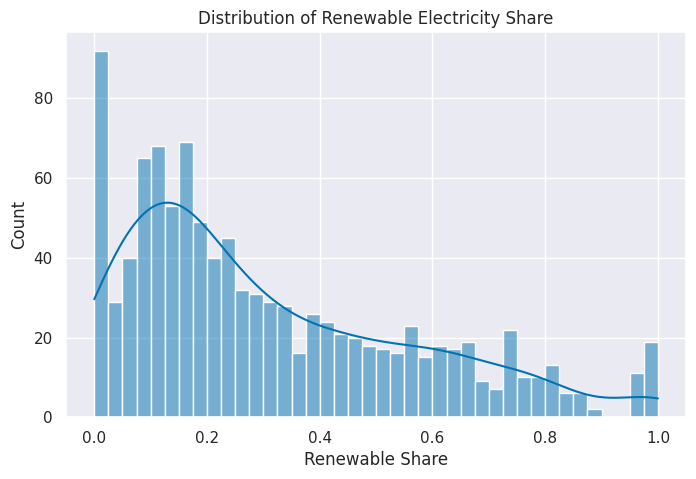

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["renewable_share"], bins=40, kde=True)
plt.title("Distribution of Renewable Electricity Share")
plt.xlabel("Renewable Share")
plt.show()

### CO₂ per capita distribution

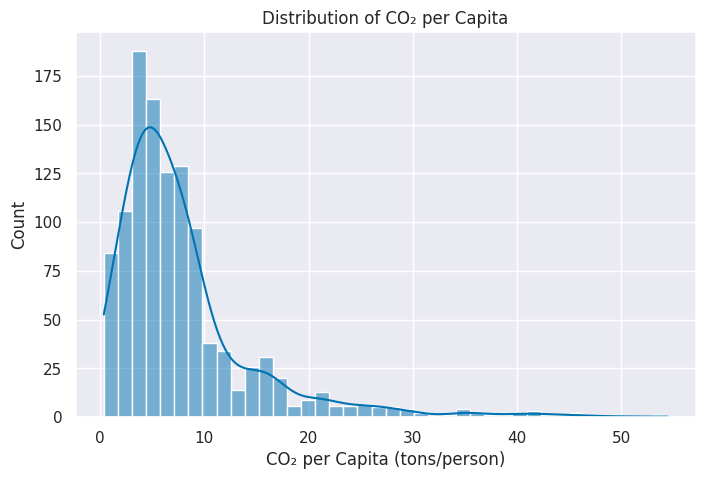

In [8]:
df["CO2_per_capita"] = df["CO2"] * 1000000 / df["Population"]

plt.figure(figsize=(8,5))
sns.histplot(df["CO2_per_capita"], bins=40, kde=True)
plt.title("Distribution of CO₂ per Capita")
plt.xlabel("CO₂ per Capita (tons/person)")
plt.show()

### Expansions Applied: Combining into 1 visual Log

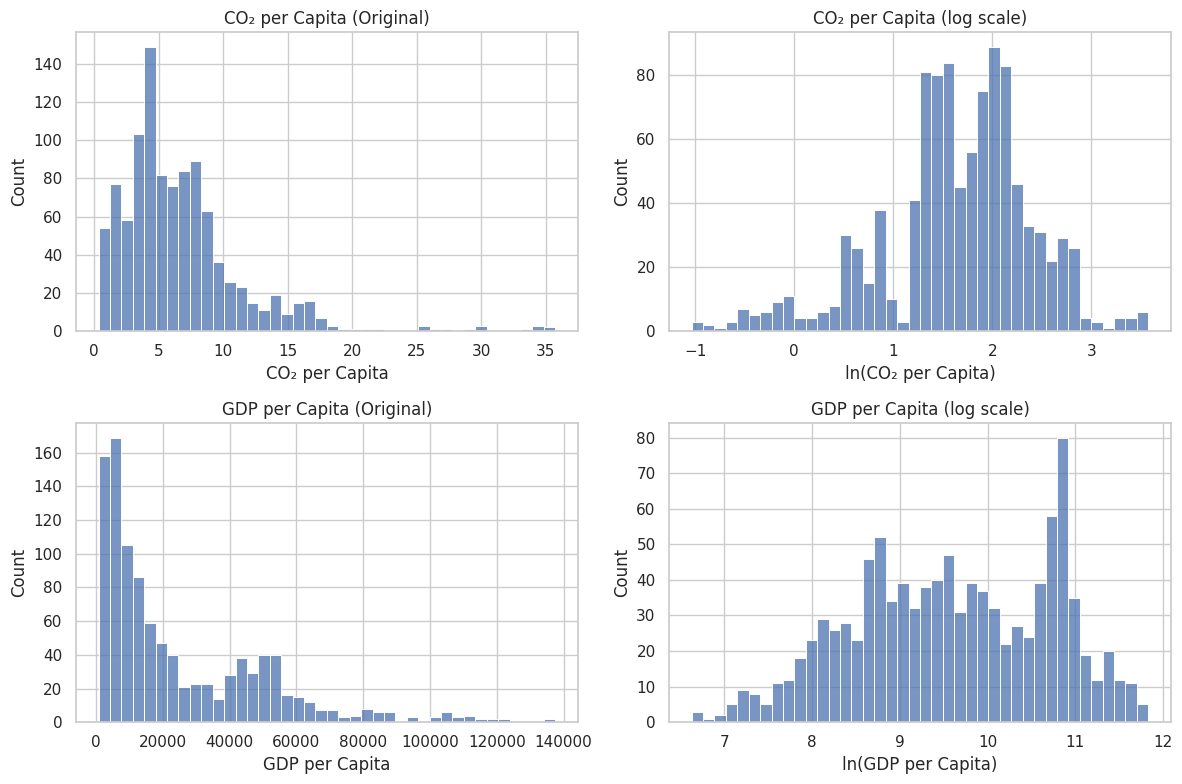

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# CO2 per capita: original
sns.histplot(df_model["CO2_per_capita"], bins=40, ax=axes[0, 0])
axes[0, 0].set_title("CO₂ per Capita (Original)")
axes[0, 0].set_xlabel("CO₂ per Capita")

# CO2 per capita: log
sns.histplot(df_model["ln_CO2_pc"], bins=40, ax=axes[0, 1])
axes[0, 1].set_title("CO₂ per Capita (log scale)")
axes[0, 1].set_xlabel("ln(CO₂ per Capita)")

# GDP per capita: original
sns.histplot(df_model["GDP_per_capita"], bins=40, ax=axes[1, 0])
axes[1, 0].set_title("GDP per Capita (Original)")
axes[1, 0].set_xlabel("GDP per Capita")

# GDP per capita: log
sns.histplot(df_model["ln_GDP_pc"], bins=40, ax=axes[1, 1])
axes[1, 1].set_title("GDP per Capita (log scale)")
axes[1, 1].set_xlabel("ln(GDP per Capita)")

plt.tight_layout()
plt.show()


## Scatterplots

### Renewable share vs CO₂ per capita

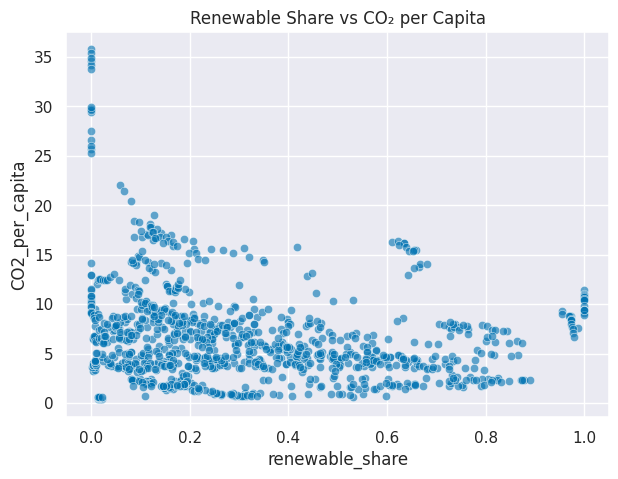

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="renewable_share", y="CO2_per_capita", alpha=0.6)
plt.title("Renewable Share vs CO₂ per Capita")
plt.show()

### GDP per capita vs CO₂ per capita

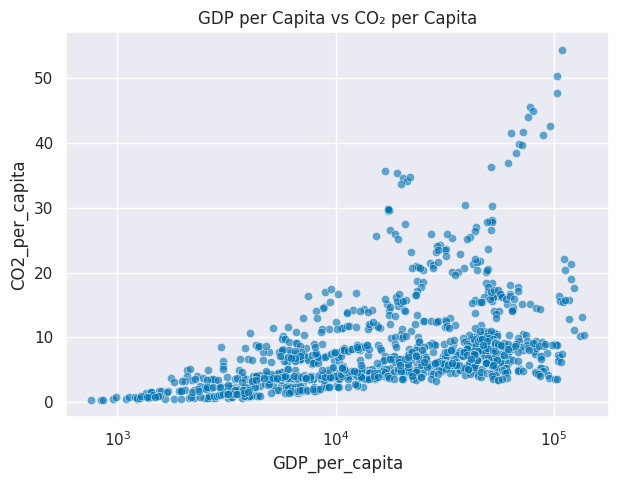

In [10]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="GDP_per_capita", y="CO2_per_capita", alpha=0.6)
plt.xscale("log")
plt.title("GDP per Capita vs CO₂ per Capita")
plt.show()

### Expansions Applied: Top/Bottom 10, colored by region

In [62]:
# Compute average renewable share per country
avg_renewables = df.groupby("iso3")["renewable_share"].mean()

# Top 10 and Bottom 10
top10_iso = avg_renewables.nlargest(10).index
bottom10_iso = avg_renewables.nsmallest(10).index

selected_iso = list(top10_iso) + list(bottom10_iso)

# Filter dataframe
df_top_bottom = df[df["iso3"].isin(selected_iso)]


####**Renewable share vs CO₂ per capita, colored by iso3** (2010-2024)

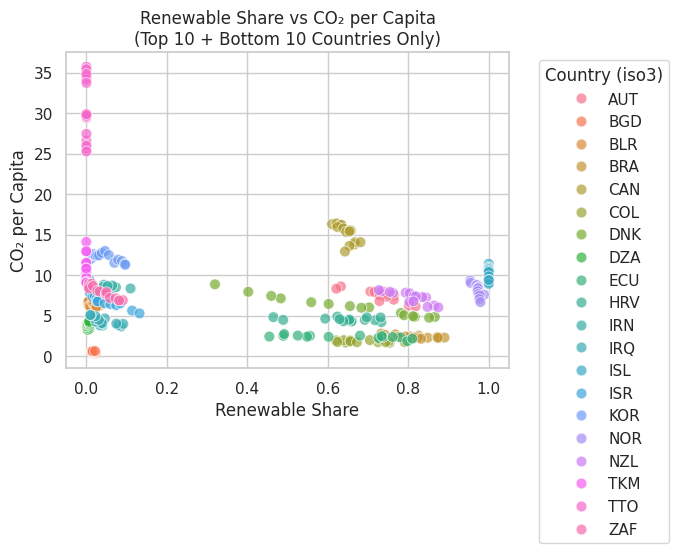

In [63]:
plt.figure(figsize=(7, 5))

sns.scatterplot(
    data=df_top_bottom,
    x="renewable_share",
    y="CO2_per_capita",
    hue="iso3",
    alpha=0.7,
    s=60
)

plt.title("Renewable Share vs CO₂ per Capita\n(Top 10 + Bottom 10 Countries Only)")
plt.xlabel("Renewable Share")
plt.ylabel("CO₂ per Capita")

plt.legend(title="Country (iso3)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


- **X-axis**: renewable_share – fraction of electricity from renewables

- **Y-axis**: CO2_per_capita – tons of CO₂ per person

- **Points**: country–year observations for only the top 10 and bottom 10 countries by average renewable share

- **Color** (hue="iso3"): which country the point belongs to

There are many points of the same color becuase data from 2010-2024 is being displayed

####**GDP per capita vs CO₂ per capita (log x-axis), colored by iso3** (2010-2024)

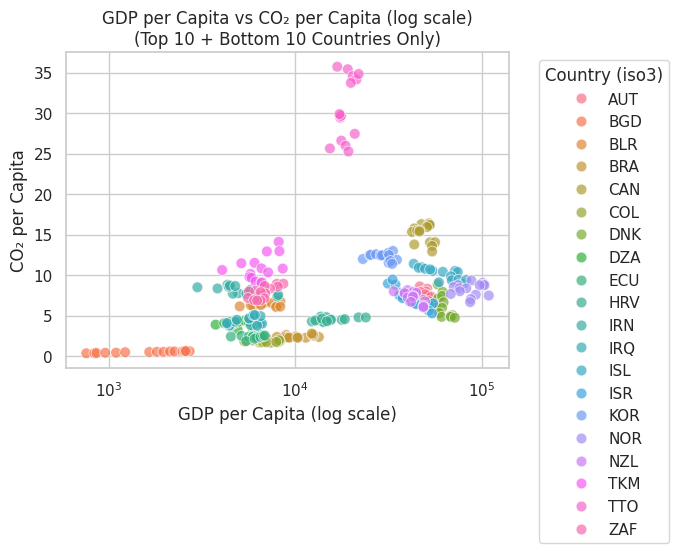

In [64]:
plt.figure(figsize=(7, 5))

sns.scatterplot(
    data=df_top_bottom,
    x="GDP_per_capita",
    y="CO2_per_capita",
    hue="iso3",
    alpha=0.7,
    s=60
)

plt.xscale("log")
plt.title("GDP per Capita vs CO₂ per Capita (log scale)\n(Top 10 + Bottom 10 Countries Only)")
plt.xlabel("GDP per Capita (log scale)")
plt.ylabel("CO₂ per Capita")

plt.legend(title="Country (iso3)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## Correlation matrix

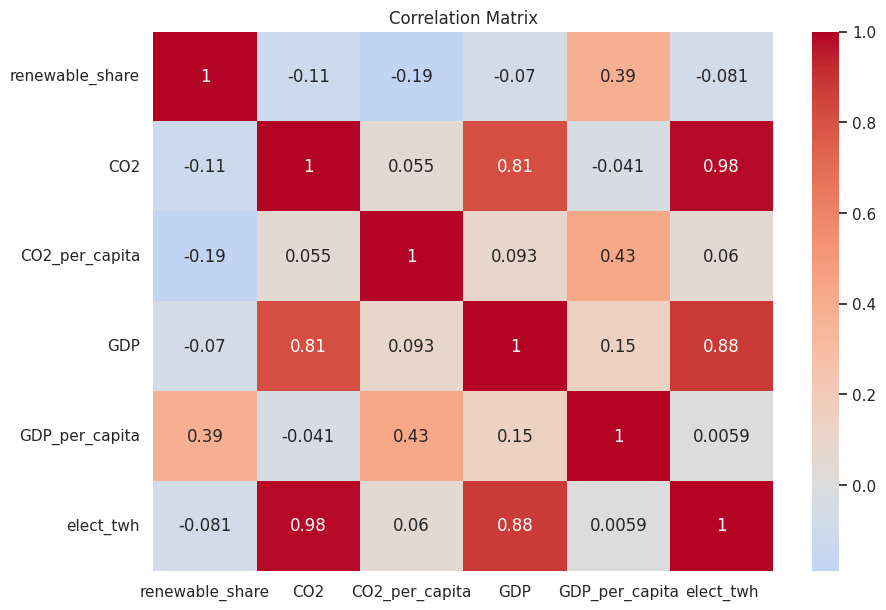

In [11]:
corr_vars = [
    "renewable_share",
    "CO2",
    "CO2_per_capita",
    "GDP",
    "GDP_per_capita",
    "elect_twh",
]

plt.figure(figsize=(10,7))
sns.heatmap(df[corr_vars].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

## Time trends by country

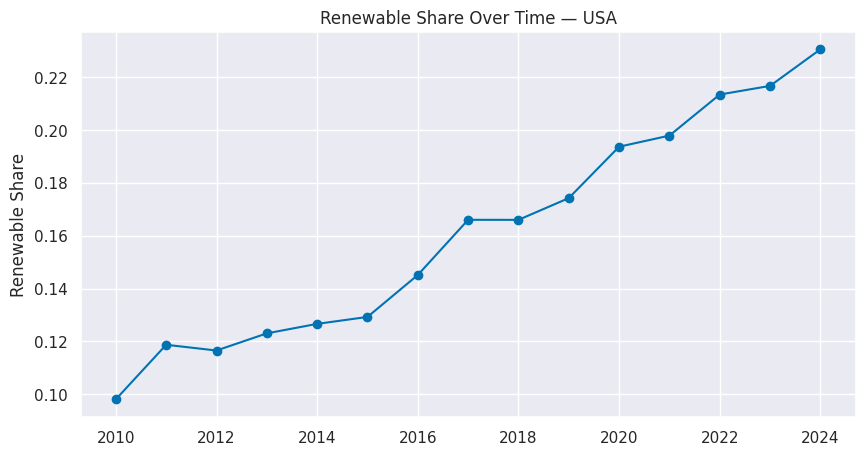

In [12]:
country = "USA"

subset = df[df["iso3"] == country]

plt.figure(figsize=(10,5))
plt.plot(subset["Year"], subset["renewable_share"], marker="o")
plt.title(f"Renewable Share Over Time — {country}")
plt.ylabel("Renewable Share")
plt.show()

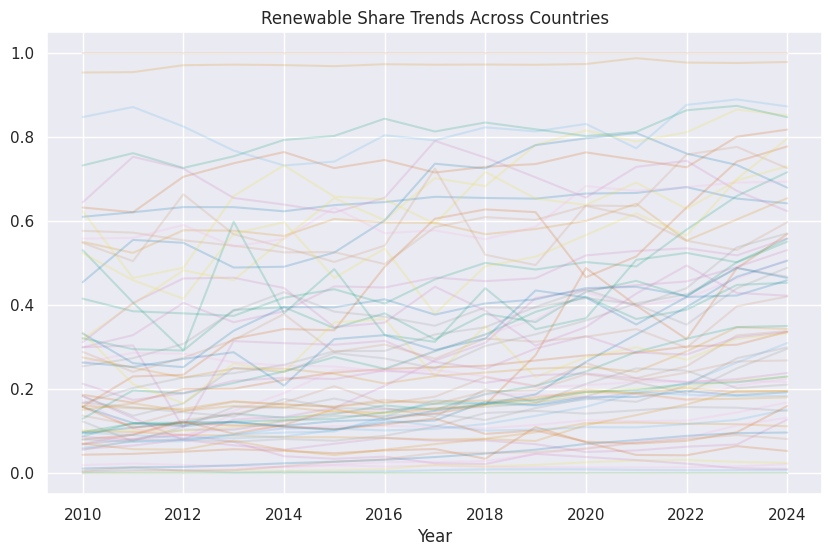

In [13]:
countries = df["iso3"].unique()

for c in countries:
    plt.plot(df[df["iso3"]==c]["Year"], df[df["iso3"]==c]["renewable_share"], alpha=0.2)
plt.title("Renewable Share Trends Across Countries")
plt.xlabel("Year")
plt.show()

## Top and bottom renewable countries

In [14]:
latest_year = df["Year"].max()
latest = df[df["Year"] == latest_year]

top10 = latest.nlargest(10, "renewable_share")[["iso3", "renewable_share"]]
bottom10 = latest.nsmallest(10, "renewable_share")[["iso3", "renewable_share"]]

print("Top 10 Renewable Countries:")
print(top10)
print("\nBottom 10 Renewable Countries:")
print(bottom10)

Top 10 Renewable Countries:
    iso3  renewable_share
539  ISL         0.999854
779  NOR         0.979184
149  BRA         0.873341
284  DNK         0.851794
794  NZL         0.847606
59   AUT         0.818142
884  PRT         0.796553
659  LTU         0.778051
434  HRV         0.731169
689  LVA         0.726277

Bottom 10 Renewable Countries:
     iso3  renewable_share
1034  TKM         0.000272
1049  TTO         0.000725
299   DZA         0.007448
524   IRQ         0.010412
104   BGD         0.022074
134   BLR         0.025041
509   IRN         0.053199
1139  ZAF         0.081716
614   KOR         0.097103
329   EGY         0.111955


### Expansions Applied: Pairewise of Top/Bottom 10 "Renewable" Countries

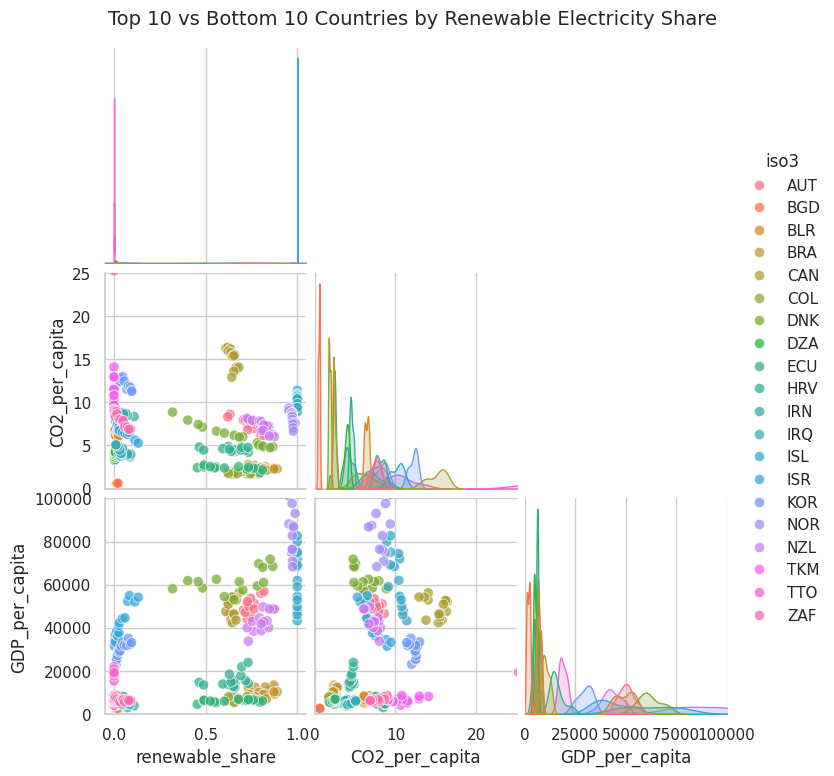

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtered df from your run
df_plot = df_top_bottom.copy()

# Create a grid of scatter-only plots (no diagonal)
g = sns.pairplot(
    data=df_plot,
    vars=["renewable_share", "CO2_per_capita", "GDP_per_capita"],
    hue="iso3",
    corner=True,          # eliminates upper triangle + diagonal
    plot_kws={"alpha": 0.75, "s": 55}
)

# Zoom axes for better visual clarity
for ax in g.axes.flatten():
    if ax is None:
        continue

    xlabel = ax.get_xlabel()
    ylabel = ax.get_ylabel()

    # X-axis limits
    if xlabel == "renewable_share":
        ax.set_xlim(-0.05, 1.05)  # keep full range, slightly padded
    elif xlabel == "CO2_per_capita":
        ax.set_xlim(0, 25)        # zoom visible region
    elif xlabel == "GDP_per_capita":
        ax.set_xlim(0, 100000)    # zoom visible region

    # Y-axis limits
    if ylabel == "renewable_share":
        ax.set_ylim(-0.05, 1.05)
    elif ylabel == "CO2_per_capita":
        ax.set_ylim(0, 25)
    elif ylabel == "GDP_per_capita":
        ax.set_ylim(0, 100000)

# Clean title (no printed list)
g.fig.suptitle(
    "Top 10 vs Bottom 10 Countries by Renewable Electricity Share",
    y=1.03,
    fontsize=14
)

plt.show()

## Global trends over time

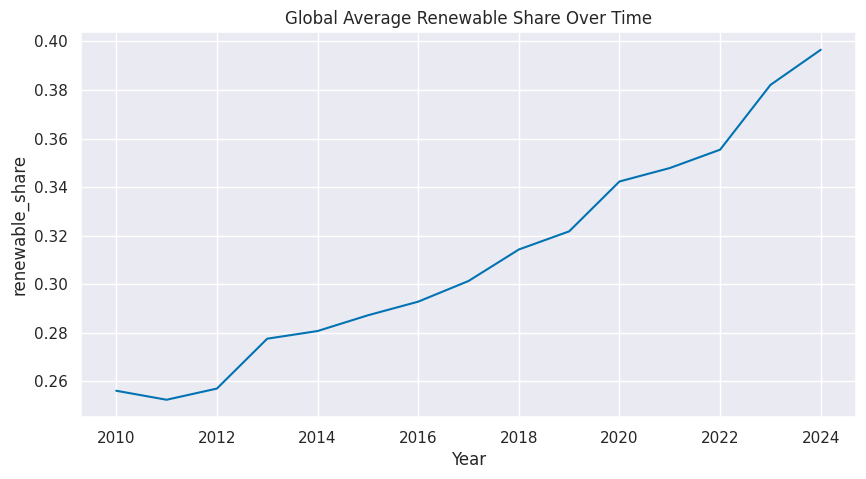

In [15]:
yearly = df.groupby("Year")["renewable_share"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=yearly, x="Year", y="renewable_share")
plt.title("Global Average Renewable Share Over Time")
plt.show()

# Modeling

## Panel regression model

### Data prep

In [16]:
# Basic cleaning: keep only rows with needed vars and positive values
df_model = df.dropna(subset=["renewable_share", "CO2_per_capita", "GDP_per_capita"]).copy()
df_model = df_model[(df_model["CO2_per_capita"] > 0) & (df_model["GDP_per_capita"] > 0)]

# Log transforms
df_model["ln_CO2_pc"] = np.log(df_model["CO2_per_capita"])
df_model["ln_GDP_pc"] = np.log(df_model["GDP_per_capita"])

# Make renewable share a percentage for easier interpretation
df_model["renewable_share_pct"] = df_model["renewable_share"] * 100

### Fixed-effects panel regression (country + year)

Use ordinary least squares (OLS) with dummy variables for country and year, which is equaivalent to a two-way fixed-effects panel model.

In [17]:
import statsmodels.formula.api as smf

# Formula:
# ln_CO2_pc_it = β1 * renewable_share_pct_it + β2 * ln_GDP_pc_it
#                 + country fixed effects + year fixed effects + error

fe_formula = "ln_CO2_pc ~ renewable_share_pct + ln_GDP_pc + C(iso3) + C(Year)"

model_fe = smf.ols(fe_formula, data=df_model).fit(
    cov_type="cluster", cov_kwds={"groups": df_model["iso3"]}
)

print(model_fe.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_CO2_pc   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     27.50
Date:                Wed, 10 Dec 2025   Prob (F-statistic):           1.71e-23
Time:                        19:19:39   Log-Likelihood:                 972.82
No. Observations:                1034   AIC:                            -1776.
Df Residuals:                     949   BIC:                            -1356.
Df Model:                          84                                         
Covariance Type:              cluster                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.4227    

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 84, but rank is 16
  warnings.warn('covariance of constraints does not have full '


### Main finding: Renewable energy reduces CO₂ per capita

**Coefficient:** -0.011
**p-value:** < 0.001

Each 1-percentage-point increase in renewable electricity share is associated with a 1.1% decrease in CO₂ emissions per capita (within a country) after controlling for GDP and all country/year effects.

### Other findings

#### GDP per capita increases CO₂

**Coefficient:** 0.2305
**p-value:** 0.003

A 1% increase in GDP per capita is associated with a 0.23% increase in CO₂ per capita, holding everything else constant. This is consistent with the standard findings in energy economics: welathier countries consume more energy and they tend to emit more, unless decarbonized.

**Model fit:** R-squared = 0.985

This looks extremely high, but is expected because:

*   Country effects explain huge structural differences
*   Year effects remove global shocks
*   Very little unexplained variation remains

## Analyze lagged renewable share (to capture delayed effects)

### Create a 1-year lag of renewable share percentage

In [18]:
# Ensure dataframe is sorted by country and year
df_model = df_model.sort_values(["iso3", "Year"])

# Create 1-year lag of renewable share (percentage form)
df_model["renew_share_lag1"] = df_model.groupby("iso3")["renewable_share_pct"].shift(1)

This means:

* For year 2012, lag1 = 2011 renewable share
* For year 2013, lag1 = 2012 renewable share
* For the first year for each country, lag = NaN

In [19]:
# Drop rows where lag is missing
df_lag = df_model.dropna(subset=["renew_share_lag1"])

### Run fixed-effects panel regression with the lag

In [ ]:
fe_formula_lag = """
    ln_CO2_pc ~ renewable_share_pct
               + renew_share_lag1
               + ln_GDP_pc
               + C(iso3) + C(Year)
"""

model_fe_lag = smf.ols(
    fe_formula_lag,
    data=df_lag
).fit(
    cov_type="cluster",
    cov_kwds={"groups": df_lag["iso3"]}
)

print(model_fe_lag.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_CO2_pc   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     58.22
Date:                Mon, 08 Dec 2025   Prob (F-statistic):           2.86e-33
Time:                        20:05:52   Log-Likelihood:                 958.80
No. Observations:                 965   AIC:                            -1748.
Df Residuals:                     880   BIC:                            -1333.
Df Model:                          84                                         
Covariance Type:              cluster                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.2370    

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 84, but rank is 16
  warnings.warn('covariance of constraints does not have full '


### Immediate effect of renewables (current year)



**Coefficient on renewable_share_pct:** −0.0095

A 1 percentage point increase in renewable electricity share this year is associated with a 0.95% decrease in CO₂ emissions per capita this year, holding GDP per capita constant and controlling for country and year fixed effects. This is highly statistically significant (p < 0.001).


### Lagged effect of renewables (previous year)



**Coefficient on renew_share_lag1:** −0.0022

A 1 percentage point increase in renewable share last year is associated with an additional 0.22% decrease in CO₂ per capita this year, all else being equal.

Also statistically significant (p = 0.032), though smaller in magnitude than the contemporaneous effect.

The impact of renewables is not only immediate, but continues to reduce emissions in subsequent years.


### Total (short + lagged) effect



**Total:** -0.0095 + -0.0022 = -0.0117

Over a two-year horizon, a 1 percentage point increase in renewable electricity share is associated with a 1.17% reduction in CO₂ emissions per capita. Or, put differently, roughly 80% of the effect is immediate and 20% shows up with a one-year delay.

### Add a second lag

#### Create Lag1 and Lag2 variables

In [21]:
# Sort by country and year
df_model = df_model.sort_values(["iso3", "Year"])

# Create 1-year and 2-year lags
df_model["renew_share_lag1"] = df_model.groupby("iso3")["renewable_share_pct"].shift(1)
df_model["renew_share_lag2"] = df_model.groupby("iso3")["renewable_share_pct"].shift(2)

# Keep rows where all required values exist
df_lag2 = df_model.dropna(subset=["renew_share_lag1", "renew_share_lag2"])

This removes the first two years of each country (because lag2 is missing)

#### Panel regression with Current + Lag1 + Lag2

In [22]:
fe_formula_lag2 = """
    ln_CO2_pc ~
        renewable_share_pct +
        renew_share_lag1 +
        renew_share_lag2 +
        ln_GDP_pc +
        C(iso3) + C(Year)
"""

model_fe_lag2 = smf.ols(
    fe_formula_lag2,
    data=df_lag2
).fit(
    cov_type="cluster",
    cov_kwds={"groups": df_lag2["iso3"]}
)

print(model_fe_lag2.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_CO2_pc   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.378e+04
Date:                Wed, 10 Dec 2025   Prob (F-statistic):          9.49e-113
Time:                        19:19:40   Log-Likelihood:                 925.42
No. Observations:                 896   AIC:                            -1681.
Df Residuals:                     811   BIC:                            -1273.
Df Model:                          84                                         
Covariance Type:              cluster                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.1191    

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 84, but rank is 16
  warnings.warn('covariance of constraints does not have full '


### Immediate effect of renewables (current year)



**Coefficient on renewable_share_pct:** −0.0088

A 1-percentage-point increase in renewable electricity share is associated with a 0.88% reduction in CO₂ per capita this year, holding GDP per capita, country fixed effects, and year fixed effects constant. This is highly statistically significant (p < 0.001).

#### One-year lag effect

**Coefficient on renew_share_lag1:** −0.0019

An additional 1-percentage-point increase in renewable share last year reduces CO₂ per capita by another 0.19% this year.

Also statistically significant (p = 0.010).


#### Two-year lag effect

**Coefficient on renew_share_lag1:** −0.0014
**p = 0.14** -> not statistically significant

Renewable deployment two years on still has a small negative effect (0.14%), but it is not statistically distinguishable from zero.

This suggests that energy transition effects tend to peak in the first year, then have diminishing carry-over and fade out after a couple of years.

### Plot the dynamic effect

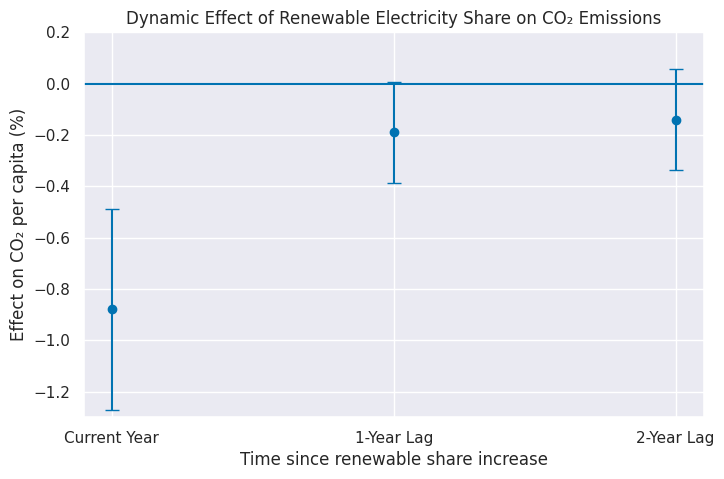

In [23]:
# Coefficients and SEs from the model
effects = np.array([-0.0088, -0.0019, -0.0014])
ses     = np.array([ 0.0020,  0.0010,  0.0010])

years = np.array([0, 1, 2])

# 95% confidence intervals
ci_upper = effects + 1.96 * ses
ci_lower = effects - 1.96 * ses

# Convert coefficients + SEs to percent effects
effects_pct = effects * 100
ses_pct = ses * 100

plt.figure(figsize=(8,5))
plt.errorbar(
    years,
    effects_pct,
    yerr=1.96 * ses_pct,
    fmt="o",
    capsize=5
)

plt.axhline(0)
plt.xticks([0,1,2], ["Current Year", "1-Year Lag", "2-Year Lag"])
plt.xlabel("Time since renewable share increase")
plt.ylabel("Effect on CO₂ per capita (%)")
plt.ylim(-1.3, 0.2)
plt.title("Dynamic Effect of Renewable Electricity Share on CO₂ Emissions")

plt.show()

Points show estimated coefficients from a fixed-effects panel regression with clustered standard errors. Error bars display 95% confidence intervals. A one-percentage-point increase in renewable electricity share is associated with an immediate reduction in CO₂ emissions per capita of approximately 0.9%, followed by an additional 0.2% reduction in the following year. The second-year lag effect is negative but not statistically significant, indicating that most decarbonization benefits occur within the first two years after renewable deployment.

### Cumulative effect plot

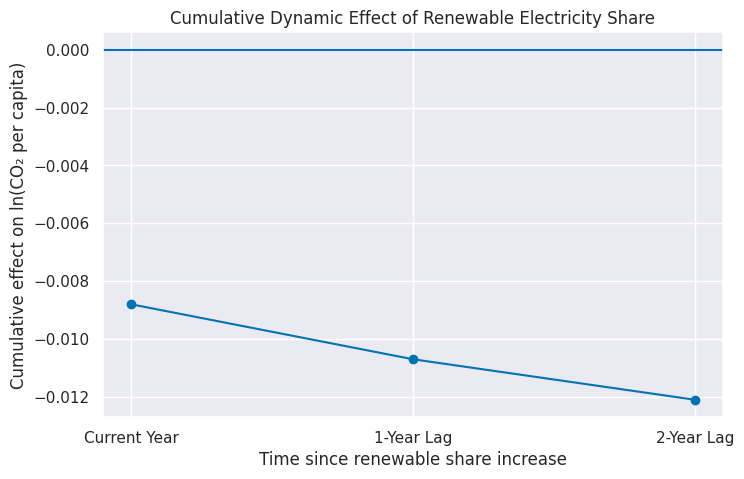

In [24]:
# Cumulative effects
cum_effects = np.cumsum(effects)

plt.figure(figsize=(8,5))
plt.plot(years, cum_effects, marker="o")

plt.axhline(0)
plt.xticks([0,1,2], ["Current Year", "1-Year Lag", "2-Year Lag"])
plt.xlabel("Time since renewable share increase")
plt.ylabel("Cumulative effect on ln(CO₂ per capita)")
plt.title("Cumulative Dynamic Effect of Renewable Electricity Share")

plt.show()

The figure shows an immediate big drop, further reduction in the following year, and further reduction still in the year after that.

### Create regression tables for report

#### Collect the models

In [25]:
models = {
    "Baseline": model_fe,
    "1-Year Lag": model_fe_lag,
    "2-Year Lag": model_fe_lag2
}

#### Extract clean coefficient table

In [26]:
import pandas as pd

vars_all = [
    "renewable_share_pct",
    "renew_share_lag1",
    "renew_share_lag2",
    "ln_GDP_pc"
]

scale_to_percent = {"renewable_share_pct", "renew_share_lag1", "renew_share_lag2"}

def star(p):
    if p <= 0.01:
        return "***"
    elif p <= 0.05:
        return "**"
    elif p <= 0.10:
        return "*"
    else:
        return ""

def format_cell(coef, se, p, scale=False):
    if scale:
        coef = coef * 100
        se   = se * 100
    return f"{coef:.2f}{star(p)} ({se:.2f})"

rows = []

for var in vars_all:
    row = {"Variable": var}
    for name, m in models.items():
        if var in m.params.index:
            coef = m.params[var]
            se   = m.bse[var]
            p    = m.pvalues[var]
            row[name] = format_cell(
                coef, se, p,
                scale=(var in scale_to_percent)
            )
        else:
            row[name] = ""
    rows.append(row)

table = pd.DataFrame(rows).set_index("Variable")

stats_rows = [
    {"Variable": "Observations", **{name: int(m.nobs) for name, m in models.items()}},
    {"Variable": "R-squared",    **{name: f"{m.rsquared:.3f}" for name, m in models.items()}},
    {"Variable": "Country FE",   **{name: "Yes" for name in models.keys()}},
    {"Variable": "Year FE",      **{name: "Yes" for name in models.keys()}},
]

stats_df = pd.DataFrame(stats_rows).set_index("Variable")

final_table = pd.concat([table, stats_df])

row_names = {
    "renewable_share_pct": "Renewable Share (%) – effect on CO₂ (%)",
    "renew_share_lag1":    "Renewable Share (t–1) – effect on CO₂ (%)",
    "renew_share_lag2":    "Renewable Share (t–2) – effect on CO₂ (%)",
    "ln_GDP_pc":           "ln(GDP per capita)"
}
final_table.rename(index=row_names, inplace=True)


In [27]:
final_table

,Baseline,1-Year Lag,2-Year Lag
Variable,,,
Renewable Share (%) – effect on CO₂ (%),-1.10*** (0.19),-0.95*** (0.16),-0.88*** (0.16)
Renewable Share (t–1) – effect on CO₂ (%),,-0.22** (0.10),-0.19** (0.07)
Renewable Share (t–2) – effect on CO₂ (%),,,-0.14 (0.09)
ln(GDP per capita),0.23*** (0.08),0.21*** (0.07),0.20*** (0.07)
Observations,1034,965,896
R-squared,0.985,0.986,0.987
Country FE,Yes,Yes,Yes
Year FE,Yes,Yes,Yes


# Robustness Tests

## Alternative specifications

### Specification A: Log(Renewable Share)

Do effects weaken as renewable share rises?

In [28]:
# Add log-renewable variable
df_lag2["ln_renew_share"] = np.log(df_lag2["renewable_share_pct"] + 1)

formula_specA = """
    ln_CO2_pc ~
        ln_renew_share +
        renew_share_lag1 +
        renew_share_lag2 +
        ln_GDP_pc +
        C(iso3) + C(Year)
"""

model_logshare = smf.ols(
    formula_specA,
    data=df_lag2
).fit(
    cov_type="cluster",
    cov_kwds={"groups": df_lag2["iso3"]}
)

print(model_logshare.summary())

/tmp/ipython-input-421988967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lag2["ln_renew_share"] = np.log(df_lag2["renewable_share_pct"] + 1)


                            OLS Regression Results                            
Dep. Variable:              ln_CO2_pc   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     142.8
Date:                Wed, 10 Dec 2025   Prob (F-statistic):           8.64e-46
Time:                        19:19:42   Log-Likelihood:                 921.32
No. Observations:                 896   AIC:                            -1673.
Df Residuals:                     811   BIC:                            -1265.
Df Model:                          84                                         
Covariance Type:              cluster                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2011      0.612  

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 84, but rank is 16
  warnings.warn('covariance of constraints does not have full '


The sign (negative), significance, and order of magnitude of the renewable effect are all robust to this alternative functional form.

### Specification B: Electricity generation scale

Current model controls for GDP but not for energy scale. Big grids emit more CO₂ regardless of renewable mix. To test, add log electricity generation per capita.

In [29]:
df_lag2["elect_pc"] = df_lag2["elect_twh"] / df_lag2["Population"]
df_lag2["ln_elect_pc"] = np.log(df_lag2["elect_pc"] + 1e-6)

formula_specC = """
    ln_CO2_pc ~
        renewable_share_pct +
        renew_share_lag1 +
        renew_share_lag2 +
        ln_GDP_pc +
        ln_elect_pc +
        C(iso3) + C(Year)
"""

model_energy_scale = smf.ols(
    formula_specC,
    data=df_lag2
).fit(
    cov_type="cluster",
    cov_kwds={"groups": df_lag2["iso3"]}
)

print(model_energy_scale.summary())

/tmp/ipython-input-2677184472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lag2["elect_pc"] = df_lag2["elect_twh"] / df_lag2["Population"]
/tmp/ipython-input-2677184472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lag2["ln_elect_pc"] = np.log(df_lag2["elect_pc"] + 1e-6)


                            OLS Regression Results                            
Dep. Variable:              ln_CO2_pc   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.258e+04
Date:                Wed, 10 Dec 2025   Prob (F-statistic):          1.44e-120
Time:                        19:19:43   Log-Likelihood:                 1135.7
No. Observations:                 896   AIC:                            -2099.
Df Residuals:                     810   BIC:                            -1687.
Df Model:                          85                                         
Covariance Type:              cluster                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.5472    

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 85, but rank is 17
  warnings.warn('covariance of constraints does not have full '


#### Contemporaneous effect

**Coefficient:** -0.0056
**p-value:** < 0.001

The effect is smaller, but has the same sign, is still strong, and is still highly significant.

#### Lagged effects
**lag1 Coefficient:** -0.0009
**lag1 p-value:** = 0.07 (Small, borderline significant)
**lag2 Coefficient:** -0.0007
**lag2 p-value:** = 0.29 (Small, not significant)

Controlling for electricity scale, most of the effect of renewables is contemporaneous; there's weak evidence of a one-year carry-over, and little left by year two.

#### Electricity scale

**Coefficient:** -0.7504
**p-value:** < 0.001

A 1% increase in electricity generation per person is associated with a 0.75% increase in CO₂ per capita, holding everything else constant. Meaning: how much power people use is a major driver of emissions. However, renewables still reduce emissions over and above this volume effect.

## Outlier removal

For outlier removal, we'll use the inter-quartile range (IQR) method.

In [30]:
df_fe = model_fe_lag2.model.data.frame.copy()

print(df_fe.columns)
print("Original N:", len(df_fe))

Index(['iso3', 'Year', 'biogeo_twh', 'elect_twh', 'hydro_twh', 'ren_power_twh', 'solar_twh', 'wind_twh', 'renewable_share', 'CO2', 'Population', 'GDP', 'GDP_per_capita', 'CO2_per_capita', 'ln_CO2_pc', 'ln_GDP_pc', 'renewable_share_pct', 'renew_share_lag1', 'renew_share_lag2', 'ln_renew_share', 'elect_pc', 'ln_elect_pc'], dtype='object')
Original N: 896


In [31]:
def iqr_filter(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return df[(df[col] >= lower) & (df[col] <= upper)]

df_out = df_fe.copy()

for col in ["ln_CO2_pc", "renewable_share_pct", "ln_GDP_pc"]:
    df_out = iqr_filter(df_out, col)

print("After outlier removal:", len(df_out))
print("Removed:", len(df_fe) - len(df_out))

After outlier removal: 843
Removed: 53


In [32]:
formula_fe = model_fe_lag2.model.formula

model_fe_lag2_clean = smf.ols(
    formula_fe,
    data=df_out
).fit(
    cov_type="cluster",
    cov_kwds={"groups": df_out["iso3"]}
)

print(model_fe_lag2_clean.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_CO2_pc   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     6447.
Date:                Wed, 10 Dec 2025   Prob (F-statistic):           1.58e-97
Time:                        19:19:43   Log-Likelihood:                 896.93
No. Observations:                 843   AIC:                            -1630.
Df Residuals:                     761   BIC:                            -1241.
Df Model:                          81                                         
Covariance Type:              cluster                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.3529    

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 81, but rank is 16
  warnings.warn('covariance of constraints does not have full '


In [33]:
vars_of_interest = [
    "renewable_share_pct",
    "renew_share_lag1",
    "renew_share_lag2",
    "ln_GDP_pc"
]

comparison = pd.DataFrame({
    "Original FE + 2 lags": model_fe_lag2.params[vars_of_interest],
    "Outliers removed": model_fe_lag2_clean.params[vars_of_interest],
})

print(comparison)

                     Original FE + 2 lags  Outliers removed
renewable_share_pct             -0.008819         -0.008949
renew_share_lag1                -0.001862         -0.001432
renew_share_lag2                -0.001368         -0.000943
ln_GDP_pc                        0.195708          0.144950


Even after removing extreme countries and years from the data, the results hardly changed. Countries that increase renewable electricity generation continue to show lower per-capita carbon emissions. This indicates the relationship is genuinely broad-based rather than driven by unusual cases.

# Expansions

### prep for me

In [34]:
df

,iso3,Year,biogeo_twh,elect_twh,hydro_twh,ren_power_twh,solar_twh,wind_twh,renewable_share,CO2,Population,GDP,GDP_per_capita,CO2_per_capita
0,ARE,2010,0.000000,93.949000,NaN,0.018424,0.018424,0.000000,NaN,185.8484,6869838.0,3.001891e+11,43696.671259,27.052807
1,ARE,2011,0.000000,99.137000,NaN,0.020696,0.020696,0.000000,NaN,198.5182,7104538.0,3.608327e+11,50789.050541,27.942450
2,ARE,2012,0.000000,106.222000,NaN,0.024242,0.024242,0.000000,NaN,208.3236,7391448.0,3.846101e+11,52034.476248,28.184410
3,ARE,2013,0.000000,109.995424,NaN,0.086912,0.085423,0.001489,NaN,214.1881,7693031.0,4.002185e+11,52023.517096,27.841835
4,ARE,2014,0.000000,116.544903,NaN,0.311409,0.308431,0.002978,NaN,214.5303,8059440.0,4.141054e+11,51381.406990,26.618512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,ZAF,2020,0.409700,239.459000,1.465,12.520700,5.700000,6.411000,0.058405,435.2977,60562381.0,3.379747e+11,5580.603831,7.187592
1136,ZAF,2021,0.409700,244.412000,2.018,15.846700,6.785000,8.652000,0.073093,439.4644,61502603.0,4.208869e+11,6843.399419,7.145460
1137,ZAF,2022,0.362000,234.910000,3.100,16.262000,6.200000,9.700000,0.082423,428.7822,62378410.0,4.069200e+11,6523.410978,6.873888
1138,ZAF,2023,0.469000,224.540000,2.000,18.469000,6.400000,11.600000,0.091160,436.6042,63212384.0,3.806993e+11,6022.542542,6.906941


In [35]:
df.columns

Index(['iso3', 'Year', 'biogeo_twh', 'elect_twh', 'hydro_twh', 'ren_power_twh', 'solar_twh', 'wind_twh', 'renewable_share', 'CO2', 'Population', 'GDP', 'GDP_per_capita', 'CO2_per_capita'], dtype='object')

### GDP vs CO2 colored by Renewables (2024)
**Can emissions fall while economies still grow?**

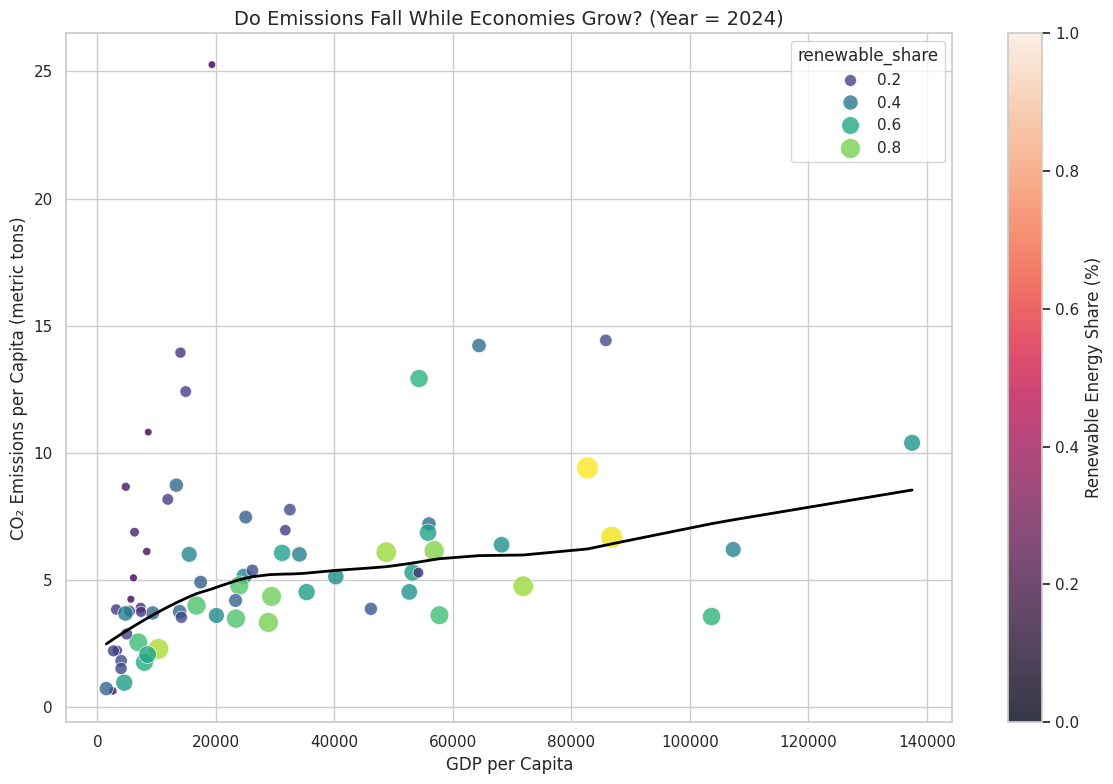

In [38]:
# Use the latest year in the dataset
latest_year = df["Year"].max()
plot_df = df[df["Year"] == latest_year].copy()

# Drop rows with missing values in the key columns
plot_df = plot_df.dropna(subset=["GDP_per_capita", "CO2_per_capita", "renewable_share"])

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

# Scatterplot: GDP vs CO2, colored and sized by renewable share
scatter = sns.scatterplot(
    data=plot_df,
    x="GDP_per_capita",
    y="CO2_per_capita",
    hue="renewable_share",
    size="renewable_share",
    palette="viridis",
    sizes=(30, 250),
    alpha=0.8
)

# Smooth trend line (LOWESS) to show overall relationship between GDP and CO2 per capita
sns.regplot(
    data=plot_df,
    x="GDP_per_capita",
    y="CO2_per_capita",
    scatter=False,
    lowess=True,
    color="black",
    line_kws={"linewidth": 2}
)

plt.title(f"Do Emissions Fall While Economies Grow? (Year = {latest_year})", fontsize=14)
plt.xlabel("GDP per Capita", fontsize=12)
plt.ylabel("CO₂ Emissions per Capita (metric tons)", fontsize=12)

# Turn the hue into a colorbar for renewable_share
cbar = plt.colorbar(scatter.collections[0])
cbar.set_label("Renewable Energy Share (%)")

plt.tight_layout()
plt.show()



Notes:

- **x-axis**: GDP_per_capita (economic growth)

- **y-axis**: CO2_per_capita (emissions per person)

- **color + size**: renewable_share (how “green” the energy mix is)

- **one year only**: the latest year in our data, so we’re not mixing time periods

**Explanation**

Relationship between GDP per capita and CO₂ emissions per capita in the most recent year of our data, with points colored and sized by renewable energy share.

Each point represents a country. Moving to the right indicates higher income, and moving down indicates lower emissions.

Countries with a higher renewable share (darker / larger points) tend to have lower emissions, even at similar GDP levels.

The smoothed trend line shows that at higher income levels, emissions per capita do not always keep rising with GDP and can even decline, consistent with the idea of partial “decoupling” of growth and emissions.

This suggests that for SOME economies, emission reductions CAN continue during economic growth when renewables make up a larger share of electricity.

### Scatterplot Top/Bottom 10 Colored by Country

#### Compute Top and Bottom 10 most "renewable"

In [ ]:
# Compute average renewable share per country
avg_renewables = df.groupby("iso3")["renewable_share"].mean()

# Top 10 and Bottom 10
top10_iso = avg_renewables.nlargest(10).index
bottom10_iso = avg_renewables.nsmallest(10).index

selected_iso = list(top10_iso) + list(bottom10_iso)

# Filter dataframe
df_top_bottom = df[df["iso3"].isin(selected_iso)]


####**Renewable share vs CO₂ per capita, colored by iso3** (2010-2024)

This shows us: <br>
**How have renewable share and CO₂ per capita changed over time for the Top 10 and Bottom 10 "most renewable" countries in 2010-2024?**

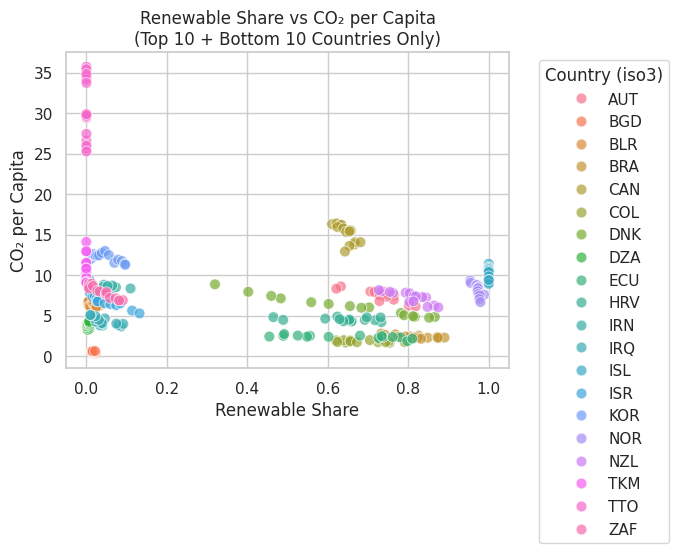

In [ ]:
plt.figure(figsize=(7, 5))

sns.scatterplot(
    data=df_top_bottom,
    x="renewable_share",
    y="CO2_per_capita",
    hue="iso3",
    alpha=0.7,
    s=60
)

plt.title("Renewable Share vs CO₂ per Capita\n(Top 10 + Bottom 10 Countries Only)")
plt.xlabel("Renewable Share")
plt.ylabel("CO₂ per Capita")

plt.legend(title="Country (iso3)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


- **X-axis**: renewable_share – fraction of electricity from renewables

- **Y-axis**: CO2_per_capita – tons of CO₂ per person

- **Points**: country–year observations for only the top 10 and bottom 10 countries by average renewable share

- **Color** (hue="iso3"): which country the point belongs to

There are many points of the same color becuase data from 2010-2024 is being displayed

####**GDP per capita vs CO₂ per capita (log x-axis), colored by iso3** (2010-2024)

This shows us: <br>
**How emissions and economic growth move together over time for the 20 countries with the highest and lowest renewable shares**

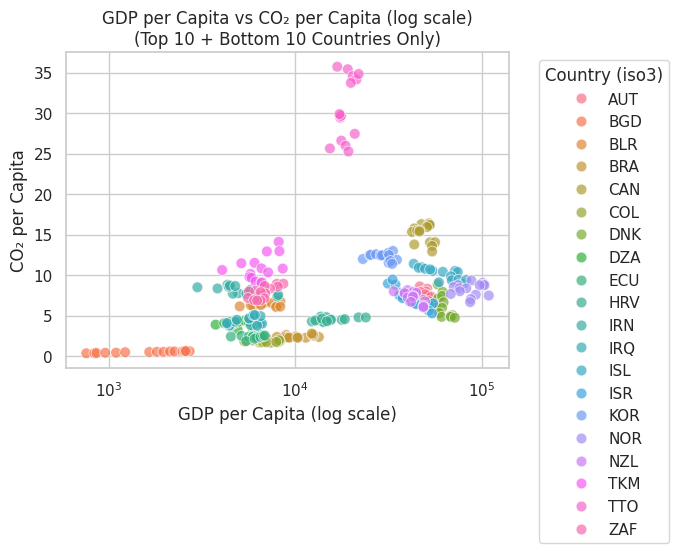

In [ ]:
plt.figure(figsize=(7, 5))

sns.scatterplot(
    data=df_top_bottom,
    x="GDP_per_capita",
    y="CO2_per_capita",
    hue="iso3",
    alpha=0.7,
    s=60
)

plt.xscale("log")
plt.title("GDP per Capita vs CO₂ per Capita (log scale)\n(Top 10 + Bottom 10 Countries Only)")
plt.xlabel("GDP per Capita (log scale)")
plt.ylabel("CO₂ per Capita")

plt.legend(title="Country (iso3)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


- **X-axis**: GDP per capita – economic output

- **Y-axis**: CO2_per_capita – tons of CO₂ per person

- **Points**: country–year observations for only the top 10 and bottom 10 countries by average renewable share

- **Color** (hue="iso3"): which country the point belongs to

There are many points of the same color becuase data from 2010-2024 is being displayed

### Overall Relationship Grid - Visual 1
to summarize EDA

#### Pairewise for EDA

<Figure size 1200x1000 with 0 Axes>

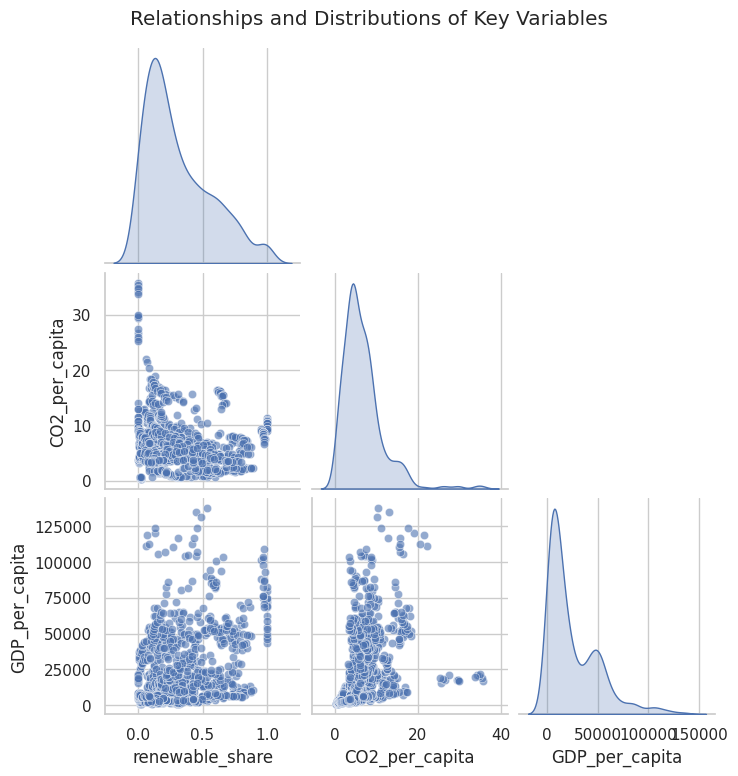

In [42]:
# Select key skewed and relationship variables
pair_df = df[['renewable_share', 'CO2_per_capita', 'GDP_per_capita']].dropna()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(
    pair_df,
    diag_kind='kde',
    corner=True,  # avoids duplicate panels
    plot_kws={'alpha': 0.6}
)

pairplot.fig.suptitle("Relationships and Distributions of Key Variables", y=1.03)
plt.show()




This combines key observations from our EDA:
- carbon emissions distribution
- GDP distribution
- Renewable share variation
- Initial relationship patterns between the variables

#### Pairwise of ALL - colored by region (ios3)

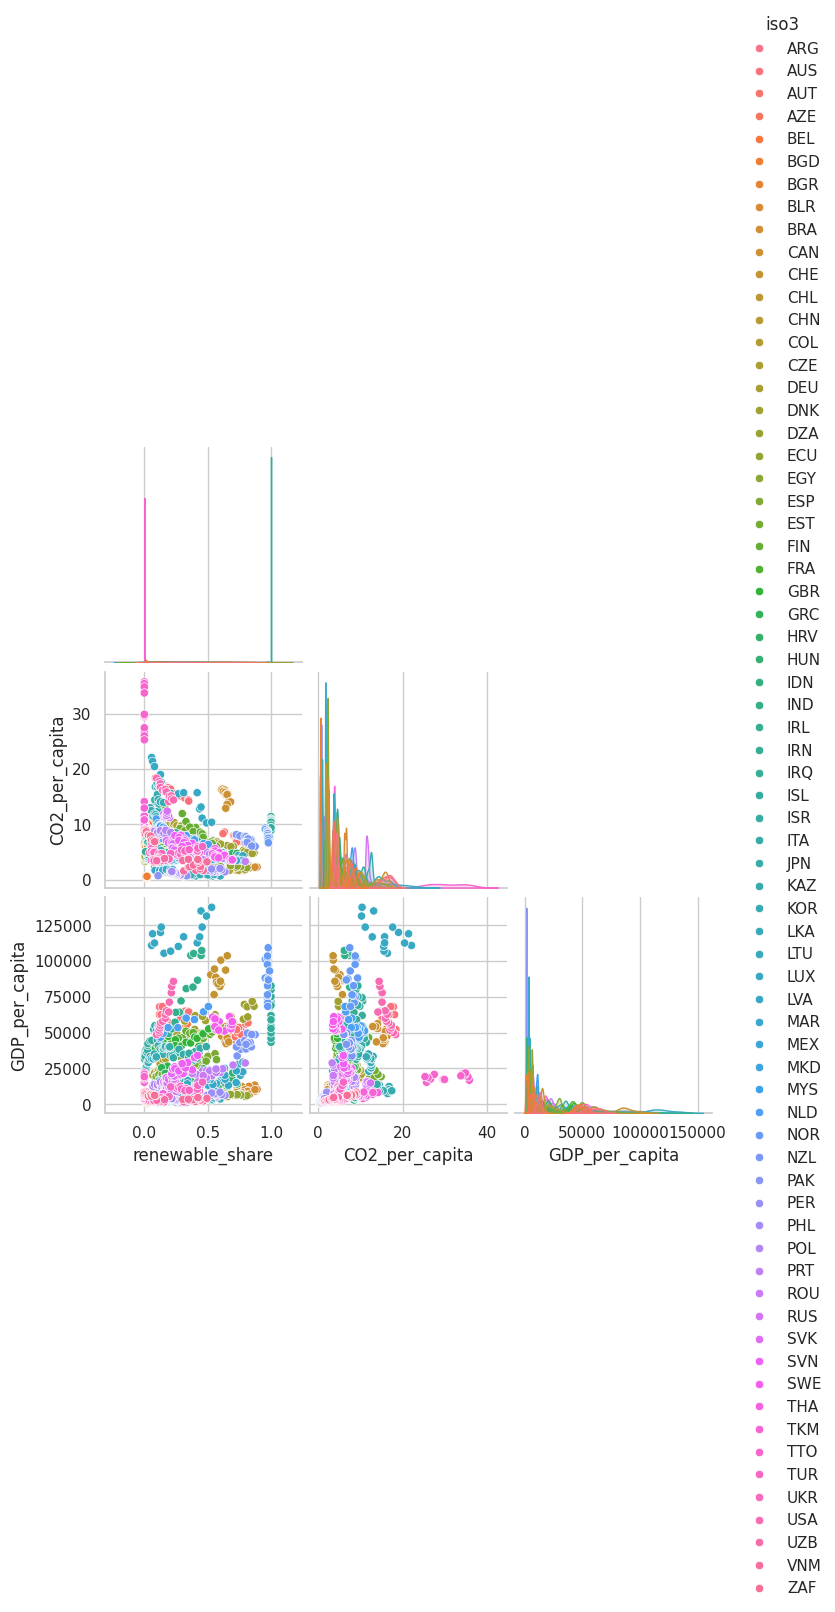

In [56]:
sns.pairplot(
    df.dropna(subset=['renewable_share','CO2_per_capita','GDP_per_capita','iso3']),
    vars=['renewable_share','CO2_per_capita','GDP_per_capita'],
    hue='iso3',
    diag_kind='kde',
    corner=True
)


#### Pairewise of Top/Bottom 10 - colored by region

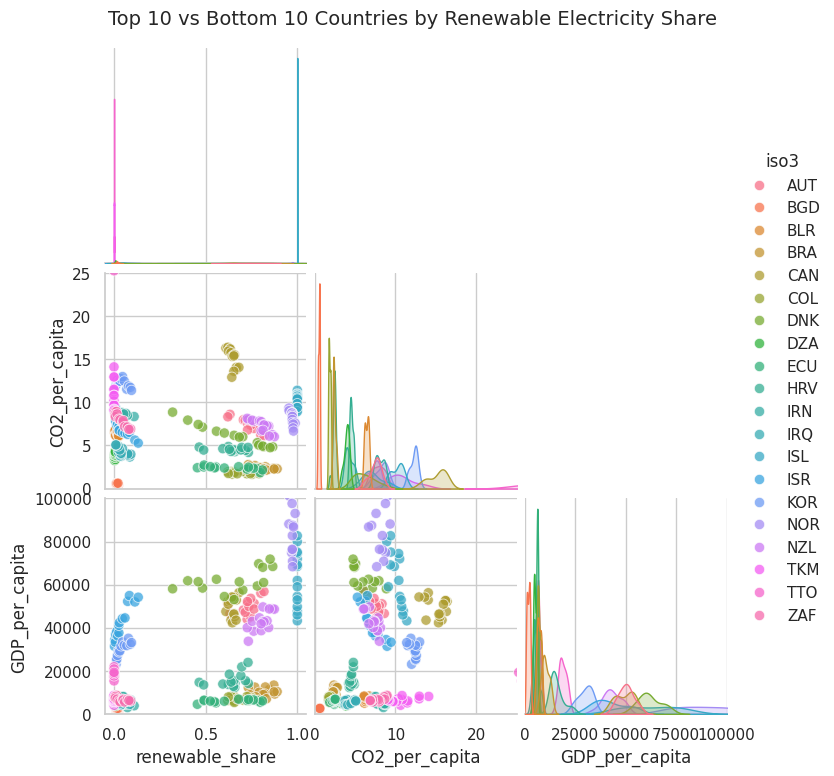

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtered df from your run
df_plot = df_top_bottom.copy()

# Create a grid of scatter-only plots (no diagonal)
g = sns.pairplot(
    data=df_plot,
    vars=["renewable_share", "CO2_per_capita", "GDP_per_capita"],
    hue="iso3",
    corner=True,          # eliminates upper triangle + diagonal
    plot_kws={"alpha": 0.75, "s": 55}
)

# Zoom axes for better visual clarity
for ax in g.axes.flatten():
    if ax is None:
        continue

    xlabel = ax.get_xlabel()
    ylabel = ax.get_ylabel()

    # X-axis limits
    if xlabel == "renewable_share":
        ax.set_xlim(-0.05, 1.05)  # keep full range, slightly padded
    elif xlabel == "CO2_per_capita":
        ax.set_xlim(0, 25)        # zoom visible region
    elif xlabel == "GDP_per_capita":
        ax.set_xlim(0, 100000)    # zoom visible region

    # Y-axis limits
    if ylabel == "renewable_share":
        ax.set_ylim(-0.05, 1.05)
    elif ylabel == "CO2_per_capita":
        ax.set_ylim(0, 25)
    elif ylabel == "GDP_per_capita":
        ax.set_ylim(0, 100000)

# Clean title (no printed list)
g.fig.suptitle(
    "Top 10 vs Bottom 10 Countries by Renewable Electricity Share",
    y=1.03,
    fontsize=14
)

plt.show()


- Top diag/KDE plots
- Three scatterplot relationships:
  - renewable_share vs CO2_per_capita
  - renewable_share vs GDP_per_capita
  - CO2_per_capita vs GDP_per_capita



### Log Transformation Visual ... if we want to use it

- We already use log scales in one scatterplot and create logged variables.
- We do not yet have an explicit “log transformation” visual ... the histogram below gives us a clear one if we want to use it.

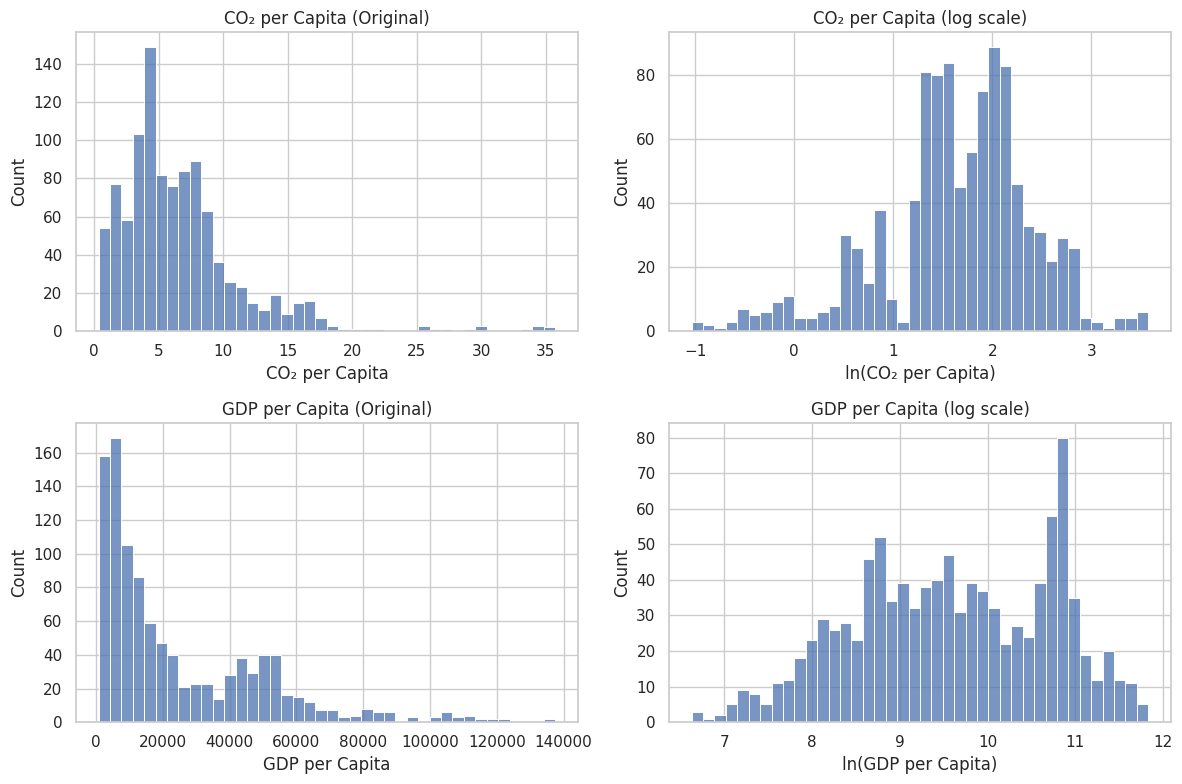

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# CO2 per capita: original
sns.histplot(df_model["CO2_per_capita"], bins=40, ax=axes[0, 0])
axes[0, 0].set_title("CO₂ per Capita (Original)")
axes[0, 0].set_xlabel("CO₂ per Capita")

# CO2 per capita: log
sns.histplot(df_model["ln_CO2_pc"], bins=40, ax=axes[0, 1])
axes[0, 1].set_title("CO₂ per Capita (log scale)")
axes[0, 1].set_xlabel("ln(CO₂ per Capita)")

# GDP per capita: original
sns.histplot(df_model["GDP_per_capita"], bins=40, ax=axes[1, 0])
axes[1, 0].set_title("GDP per Capita (Original)")
axes[1, 0].set_xlabel("GDP per Capita")

# GDP per capita: log
sns.histplot(df_model["ln_GDP_pc"], bins=40, ax=axes[1, 1])
axes[1, 1].set_title("GDP per Capita (log scale)")
axes[1, 1].set_xlabel("ln(GDP per Capita)")

plt.tight_layout()
plt.show()


### Conclusions


#### GDP vs CO2 colored by Renewables (2024)

**We have observed that carbon emissions DO seem to be declining as the global level of renewbable shares increase. But is this expected to remain consistent EVEN WHEN economies continue to grow?"**

**Purpose:** This addresses our main domain problem, while incorporating the real-world problem of over-consumpion and over-population.

**Observations:**

As countries become wealthier, emissions do increase... but our analysis concludes the they do not have to.

If renewable energy adoption is high enough, CO₂ emissions per capita can level off or even go down while GDP continues to increase.

- Our analysis shows evidence of “green growth.” Countries with higher GDP per capita (economic output) that also invest heavily in renewable energy tend to have significantly lower CO₂ emissions per capita compared to countries at a similar GDP per capita (economic output) with lower renewable shares.

- The downward trend in emissions among wealthy, high-renewable countries suggests that emissions reductions can continue during economic growth, demonstrating a decoupling of growth from carbon output when renewable energy becomes a meaningful part of the electricity supply.

**How do we know this?**

| Evidence                                                                  | Interpretation                                            |
| ------------------------------------------------------------------------- | --------------------------------------------------------- |
| High-GDP countries with higher renewable shares sit lower on the CO₂ axis | Renewables help reduce emissions at the same income level |
| Trend line flattens/declines at high GDP                                  | Growth is no longer necessarily linked to higher CO₂      |
| Cluster of high-renewable countries below the regression line             | Renewable investment improves climate outcomes            |
